<a href="https://colab.research.google.com/github/M-chandrika27/sentiment-analysis/blob/main/Copy_of_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5/06/2024

#import the dataset and do the data preprocessing.

#1.problem statement
#Develop a sentimental analysis model to classify Reviews as positive or negative .
#preprocess the review.
#preprocess the review text using techniques such as lower casing ,removing stop words and lematization.
#use the trained model accurately predict the sentiment of new,unseen reviews.

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Reviews.csv')

In [ ]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [ ]:
#we can review the top 5 rows.
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
#to review top 10 rows.
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
#to review last 5 rows.
data.tail()


,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
#to review last 10 rows.
data.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
#dataset info like data types,entries of dataset,memory usage etc...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


checking the null values and data cleaning process.

In [ ]:
#checking the null values.
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
#checking the duplicated values.
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

EDA(exploratory data analysis used to represent the data in the graphical format.To do this we use two libraries 1.matplotlib library and
2.seaborn library.)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud

In [ ]:
#combine all the reviews text data into one string.
Combined_text = " ".join(data['Review'])

In [ ]:
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(Combined_text)

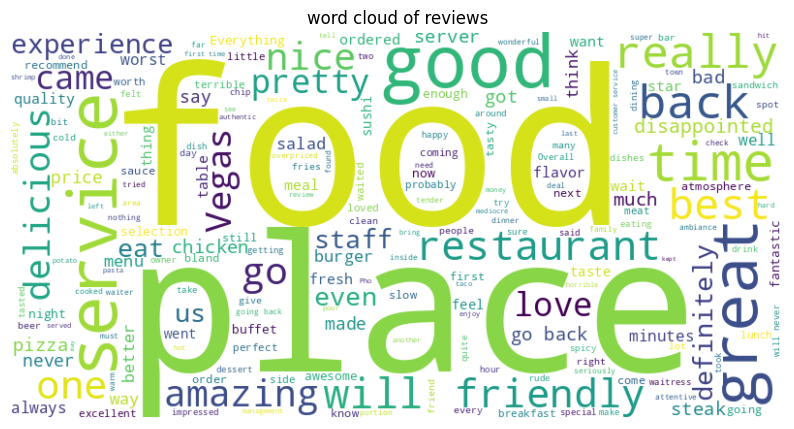

In [ ]:
# we need draw the plot ,plot the word cloud.
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('word cloud of reviews')
plt.show()

In [ ]:
from collections import Counter

In [ ]:
targeted_words=['good','great','amazing','bad','fantastic']
#single list of words.
all_words=" ".join(data['Review']).lower().split()
#flatten reviews into a single list of words.
word_counts=Counter(all_words)
target_word_count={word:word_counts[word]for word in targeted_words}

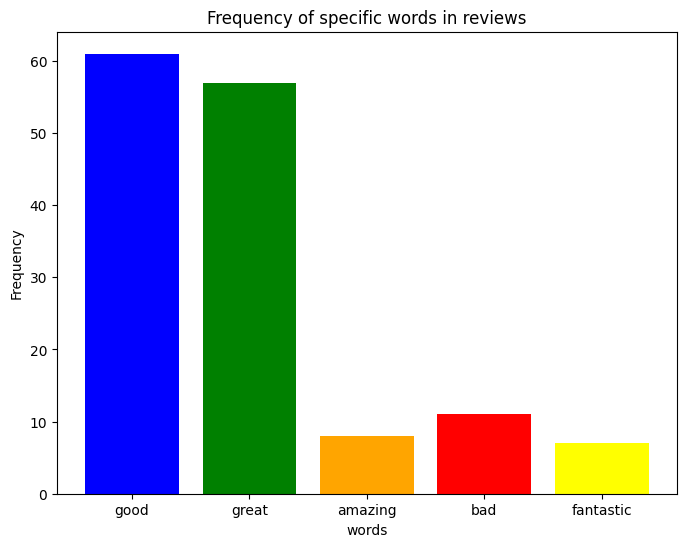

In [ ]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys() , target_word_count.values(),color=['blue','green','orange','red','yellow'])
plt.xlabel('words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

12/06/2024
#Text Preprocessing


In [ ]:
#text preprocessing
#converting a dataset into lowercase.
lowercased_text=data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


*Tokenaization*
tokenization is the process of breaking down a piece of text into smaller units,called tokens.

In [ ]:
#tokenaization
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['Tokens']=data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


removing stop words

In [ ]:
#removing stop words.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
data['Tokens']=data['Review'].apply(lambda x:[word for word in word_tokenize(x)if word not in stop_words])

In [ ]:
print (data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


stemming ->
stemming is a process of reducing words to its base or root form.

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemmer=PorterStemmer()

In [ ]:
data['stemmed']=data['Review'].apply( lambda x:" ".join([stemmer.stem(word)for word in word_tokenize(x)]))

In [ ]:
print(data['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [ ]:
data['stemmed'].value_counts()

stemmed
# name ?                                                                                                                               4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi p

Lemmatization.


In [ ]:
#lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
lemmatizer=WordNetLemmatizer()

In [ ]:
data['lemmatized']=data['Review'].apply(lambda x:' '.join([lemmatizer.lemmatize(word,pos=wordnet.VERB)for word in word_tokenize(x)]))

In [ ]:
print(data['lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: lemmatized, Length: 1000, dtype: object


Remove the numbers.

In [ ]:
#remove the numbers.
import re
data['No_Numbers']=data['Review'].apply(lambda x:re.sub(r'[0-9]+', '', x))

In [ ]:
print (data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [ ]:
data['cleaned_text']=data['Review'].apply(lambda x:re.sub(r'[^A-Za-z0-9\s]','',x))

In [ ]:
print(data['cleaned_text'])

0                                   Wow Loved this place
1                                      Crust is not good
2               Not tasty and the texture was just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly gone
997    Overall I was not impressed and would not go back
998    The whole experience was underwhelming and I t...
999    Then as if I hadnt wasted enough of my life th...
Name: cleaned_text, Length: 1000, dtype: object


contractions->used to remove special symbols.

In [ ]:
#normalization
!pip install contractions
import contractions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.5 MB/s eta 0:00:00


In [ ]:
data['Expanded']=data['Review'].apply(contractions.fix)

In [ ]:
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


remove the emoji

In [ ]:
!pip install emoji
import emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 7.6 MB/s eta 0:00:00


In [ ]:
data['Emoji']=data['Review'].apply(emoji.demojize)

In [ ]:
print(data['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


#removing html tags.


In [ ]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [ ]:
data['cleaned']=data['Review'].apply(lambda x:BeautifulSoup(x,"html.parser").get_text())

<ipython-input-72-bb4980fd22aa>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['cleaned']=data['Review'].apply(lambda x:BeautifulSoup(x,"html.parser").get_text())


In [ ]:
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


19/06/2024

#TF-IDF vectorizer
#tf-term frequency and idf-inverse document frequency
#these is used to convert the text data into matrix format.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])

In [ ]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Building machine learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])
Y=data['Liked']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X_train,X_test,Y_train,Y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [ ]:
model=MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)

In [ ]:
print(f'Accuracy:{accuracy}')
print('classification Report:')
print(report)

Accuracy:0.8
classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



#Prediction
#predict sentiment for new review.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import re

def preprocess_text(text):
  text=text.lower()
  text=re.sub(r'[^\w\s]', '',text)
  return text

def predict_sentiment(new_review):
  reviews=["This resturant food is good","This place has terrible service"]
  labels=[1,0]

  vectorizer=TfidfVectorizer()
  X=vectorizer.fit_transform(reviews)
  model=LogisticRegression()
  model.fit(X,labels)

  cleaned_review=preprocess_text(new_review)
  X_new=vectorizer.transform([cleaned_review])
  sentiment=model.predict(X_new)[0]
  sentiment_label='Positive'if sentiment == 1 else 'Negative'
  return sentiment_label
new_review="This resturant food is good"
sentiment_label=predict_sentiment(new_review)
print(f"Review:'{new_review}'\nPredict sentiment:{sentiment_label}\n")

Review:'This resturant food is good'
Predict sentiment:Positive

